##   Building fashion MNIST CNN in keras

The Fashion-MNIST dataset is a dataset of Zalando's article images, with 28x28 grayscale images of 70,000 fashion products from 10 categories, and 7,000 images per category. The training set has 60,000 images, and the test set has 10,000 images. 

In [2]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

#### `IMPORT LIBRARY`

In [4]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow
import matplotlib.pyplot as plt
from keras.utils import to_categorical

#### `Analyze the Data`

In [5]:
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [9]:
print('NO OF CLASSES: ',np.unique(train_Y,return_counts=True)[0])
print('DIVISION OF EXAMPLE IN EVERY CLASSES :',np.unique(train_Y,return_counts=True)[1])

NO OF CLASSES:  [0 1 2 3 4 5 6 7 8 9]
DIVISION OF EXAMPLE IN EVERY CLASSES : [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


###### `THERE IS EQUAL DIVISION OF EXAMPLE IN EVERY CLASS`


#### VISULIZATION


LABEL:  9


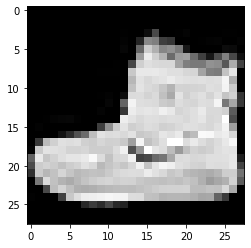

LABEL:  0


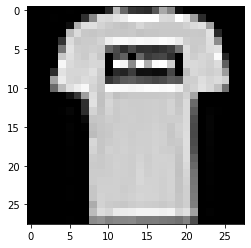

LABEL:  0


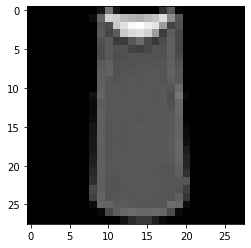

LABEL:  3


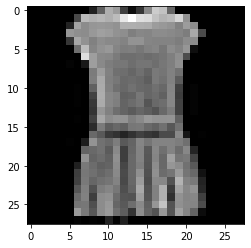

LABEL:  0


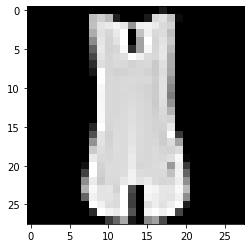

LABEL:  2


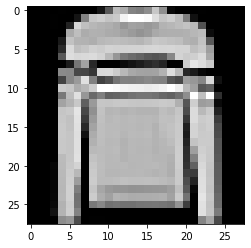

LABEL:  7


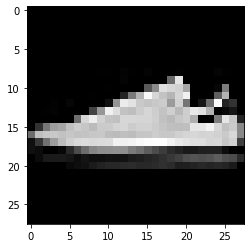

LABEL:  2


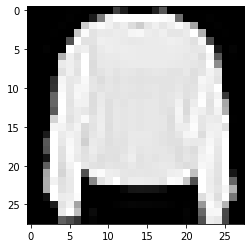

LABEL:  5


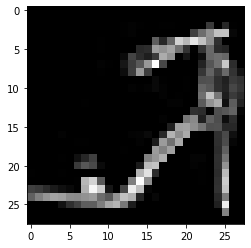

LABEL:  5


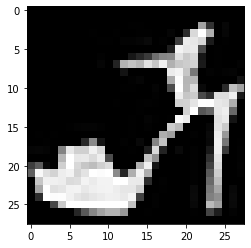

In [11]:
for i in range(10):
    print('LABEL: ',train_Y[i])
    plt.imshow(train_X[i],cmap='gray')
    
    plt.show()

The images are grayscale images have pixel values that range from 0 to 255. Also, these images have a dimension of 28 x 28.
- Convert each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1 which is fed into the network.
- The data right now is in an int8 format, so before you feed it into the network you need to convert its type to float32, and you also have to rescale the pixel values in range 0 - 1 inclusive.
- Convert the training and testing labels into one-hot encoding vectors:

In [13]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [14]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [15]:

train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


`WE ARE SPLITING THE TRAINING SET INTO TRAIN AND VALIDATION SETS`

In [17]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [20]:
print("train_X.shape :",train_X.shape)
print("valid_X.shape :",valid_X.shape)
print("train_label.shape :",train_label.shape)
print("valid_label.shape :",valid_label.shape)

train_X.shape : (48000, 28, 28, 1)
valid_X.shape : (12000, 28, 28, 1)
train_label.shape : (48000, 10)
valid_label.shape : (12000, 10)


In [21]:
num_classes = 10

# CNN Architecture

In [22]:
model=Sequential()
# this convolution layer contains 32 filter and size of (3,3) 
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
# this convolution layer contains 64 filter and size of (3,3)
model.add(Convolution2D(64,(3,3),activation='relu'))
# Model will randomly drop 25% of the neurons from previous layer
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))

model.add(Convolution2D(8,(5,5),activation='relu'))
# Flatten reshape 3d volume to a linear layer
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

# COMPILE CNN MODEL

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Train the Model

In [29]:
# shuffle =True means we will randomly shuffle our data during testing pharse
hist=model.fit(train_X,train_label,epochs=20,batch_size=256,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 144s 3ms/step - loss: 0.8319 - accuracy: 0.6990 - val_loss: 0.5180 - val_accuracy: 0.8243
Epoch 2/20
48000/48000 [==============================] - 143s 3ms/step - loss: 0.4386 - accuracy: 0.8440 - val_loss: 0.4486 - val_accuracy: 0.8464
Epoch 3/20
48000/48000 [==============================] - 144s 3ms/step - loss: 0.3684 - accuracy: 0.8680 - val_loss: 0.3775 - val_accuracy: 0.8699
Epoch 4/20
48000/48000 [==============================] - 143s 3ms/step - loss: 0.3284 - accuracy: 0.8830 - val_loss: 0.3289 - val_accuracy: 0.8860
Epoch 5/20
48000/48000 [==============================] - 142s 3ms/step - loss: 0.3000 - accuracy: 0.8925 - val_loss: 0.3177 - val_accuracy: 0.8907
Epoch 6/20
48000/48000 [==============================] - 142s 3ms/step - loss: 0.2834 - accuracy: 0.8990 - val_loss: 0.3030 - val_accuracy: 0.8924
Epoch 7/20
48000/48000 [==============================] - 143s

# Model Evaluation on the Test Set

In [30]:
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [31]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.25734119831323626
Test accuracy: 0.9107000231742859


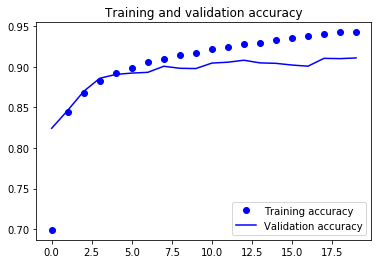

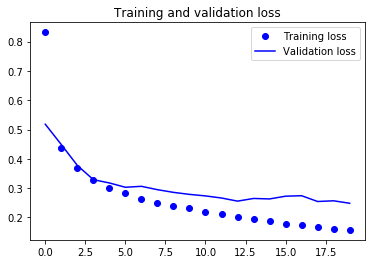

In [34]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss =hist.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Predict Labels

In [47]:
predicted_classes = model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [49]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.73      0.88      0.80      1000
     Class 1       1.00      0.97      0.98      1000
     Class 2       0.89      0.87      0.88      1000
     Class 3       0.93      0.90      0.91      1000
     Class 4       0.87      0.84      0.86      1000
     Class 5       0.99      0.96      0.98      1000
     Class 6       0.77      0.73      0.75      1000
     Class 7       0.97      0.96      0.96      1000
     Class 8       0.98      0.97      0.98      1000
     Class 9       0.95      0.98      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Found 9056 correct labels


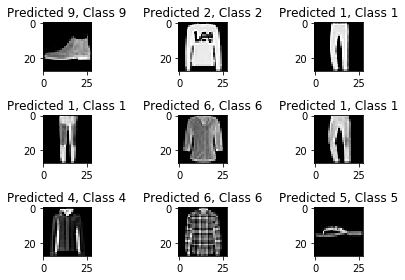

In [51]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 944 incorrect labels


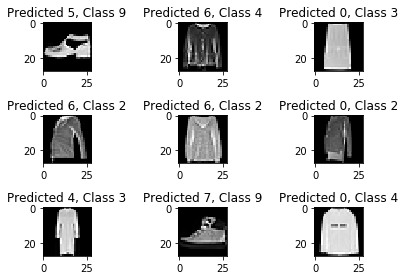

In [53]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [58]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')

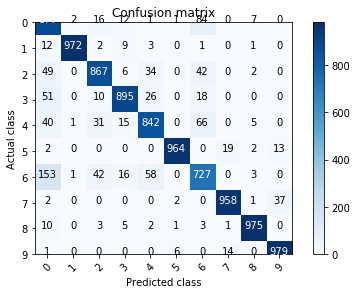

In [59]:
from sklearn.metrics import confusion_matrix
import itertools

#Y_true = numpy.argmax(y_test, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(test_Y, predicted_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

#### `REFERENCES:`
    - https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python
    - https://github.com/jorditorresBCN/DEEP-LEARNING-practical-introduction-with-Keras/blob/master/Densely-connected-networks.ipynb
    - Coding Blocks

# `THANK YOU`